## 猫狗识别

- 导入数据集
- 数据预处理，准备验证验证集和测试集
- 构建卷积网络模型
- 观察验证集和验证集上的效果，针对过拟合问题，提出解决办法
- 数据增强
- 迁移学习，深度学习的必备策略

In [1]:
#导入数据分析以及图像分类任务常用的工具包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#指定好数据的路径
import os
base_dir = 'D:\image_dataset\cats_and_dogs'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'validation')

#训练集
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

#验证集
val_cats_dir = os.path.join(val_dir,'cats')
val_dogs_dir = os.path.join(val_dir,'dogs')

### 构建卷积神经网络

In [9]:
model = tf.keras.models.Sequential([
    #添加第一个卷积池化层
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #添加第二个卷积池化层
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #添加第三个卷积池化层
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    #将卷积之后得到的feature_map展平为长向量
    tf.keras.layers.Flatten(),
    
    #添加全连接层
    tf.keras.layers.Dense(256,activation = 'relu'),
    #添加输出层
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [10]:
#打印模型的结构
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [11]:
#配置模型

model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['acc'])

### 数据预处理

- 读进来的数据会自动被转化为tensor(float32)格式，分别准备训练集和验证机
- 图像数据归一化处理，将图像数据的像素值转化为(0-1)之间

In [12]:
#构建数据生成器

train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (64,64),#指定resize的大小
                                                   batch_size = 20,
                                                   class_mode = 'binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                   target_size = (64,64),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

Found 1996 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 训练网络模型

In [13]:
history = model.fit_generator(train_generator,
                   steps_per_epoch = 100,
                   epochs = 20,
                   validation_data = val_generator,
                   validation_steps = 50,
                   verbose = 2)

Epoch 1/20
100/100 - 23s - loss: 0.6966 - acc: 0.5005 - val_loss: 0.6904 - val_acc: 0.5910
Epoch 2/20
100/100 - 20s - loss: 0.6834 - acc: 0.5842 - val_loss: 0.6485 - val_acc: 0.6400
Epoch 3/20
100/100 - 20s - loss: 0.6280 - acc: 0.6573 - val_loss: 0.5868 - val_acc: 0.6790
Epoch 4/20
100/100 - 18s - loss: 0.5655 - acc: 0.7124 - val_loss: 0.5932 - val_acc: 0.6860
Epoch 5/20
100/100 - 21s - loss: 0.5162 - acc: 0.7315 - val_loss: 0.5860 - val_acc: 0.7010
Epoch 6/20
100/100 - 21s - loss: 0.4817 - acc: 0.7700 - val_loss: 0.5785 - val_acc: 0.7020
Epoch 7/20
100/100 - 21s - loss: 0.4191 - acc: 0.8136 - val_loss: 0.5702 - val_acc: 0.7150
Epoch 8/20
100/100 - 21s - loss: 0.3324 - acc: 0.8572 - val_loss: 0.6191 - val_acc: 0.7200
Epoch 9/20
100/100 - 21s - loss: 0.2597 - acc: 0.8903 - val_loss: 0.6117 - val_acc: 0.7070
Epoch 10/20
100/100 - 20s - loss: 0.2035 - acc: 0.9193 - val_loss: 0.7065 - val_acc: 0.7290
Epoch 11/20
100/100 - 20s - loss: 0.1293 - acc: 0.9549 - val_loss: 0.7948 - val_acc: 0.72

Text(0.5,1,'the loss of the model')

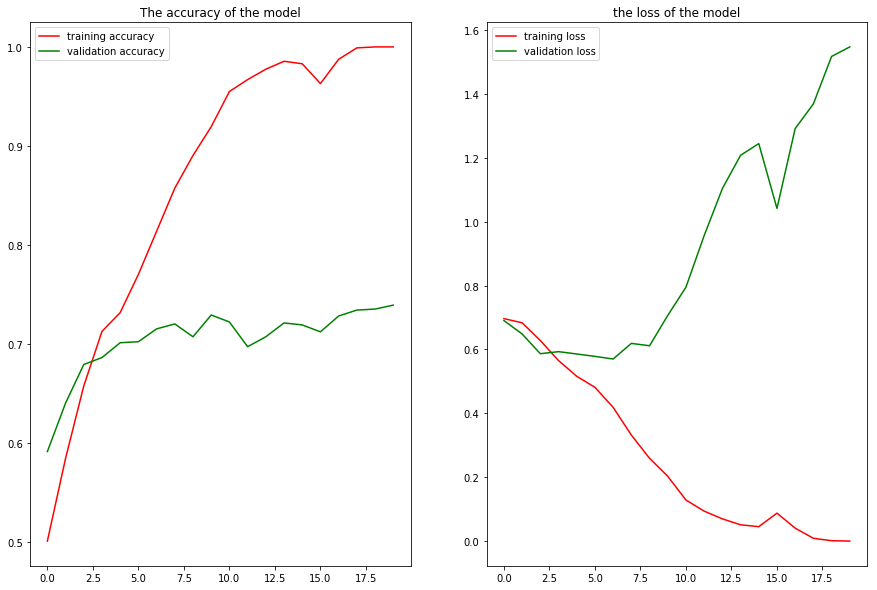

In [14]:
#绘制模型的训练效果

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize = (15,10))
plt.subplot(121)
plt.plot(epochs,acc,'r-',label = 'training accuracy')
plt.plot(epochs,val_acc,'g-',label = 'validation accuracy')
plt.legend()
plt.title('The accuracy of the model')

plt.subplot(122)
plt.plot(epochs,loss,'r-',label = 'training loss')
plt.plot(epochs,val_loss,'g-',label = 'validation loss')
plt.legend()
plt.title('the loss of the model')

由上面的训练效果可以看出，该模型存在明显的过拟合现象。

## 模型改进

在卷积层和全连接层中加入正则化惩罚项

In [15]:
model_1 = tf.keras.models.Sequential([
    #添加第一个卷积池化层
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.03),
                           input_shape = (64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #添加第二个卷积池化层
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.03)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #添加第三个卷积池化层
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.03)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    #将卷积之后得到的feature_map展平为长向量
    tf.keras.layers.Flatten(),
    
    #添加全连接层
    tf.keras.layers.Dense(256,activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.03)),
    #添加输出层
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [16]:
#配置该模型
model_1.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['acc'])

In [17]:
#训练模型
history = model_1.fit_generator(train_generator,
                   steps_per_epoch = 100,
                   epochs = 20,
                   validation_data = val_generator,
                   validation_steps = 50,
                   verbose = 2)

Epoch 1/20
100/100 - 21s - loss: 3.0409 - acc: 0.5020 - val_loss: 0.7255 - val_acc: 0.5000
Epoch 2/20
100/100 - 21s - loss: 0.7030 - acc: 0.4920 - val_loss: 0.6949 - val_acc: 0.5000
Epoch 3/20
100/100 - 22s - loss: 0.6938 - acc: 0.5010 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 4/20
100/100 - 21s - loss: 0.6932 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 5/20
100/100 - 21s - loss: 0.6932 - acc: 0.4920 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 6/20
100/100 - 21s - loss: 0.6932 - acc: 0.4920 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 7/20
100/100 - 21s - loss: 0.6932 - acc: 0.4930 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/20
100/100 - 21s - loss: 0.6932 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 9/20
100/100 - 21s - loss: 0.6932 - acc: 0.4940 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 10/20
100/100 - 21s - loss: 0.6932 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 11/20
100/100 - 22s - loss: 0.6932 - acc: 0.4870 - val_loss: 0.6931 - val_acc: 0.50

Text(0.5,1,'the loss of the model')

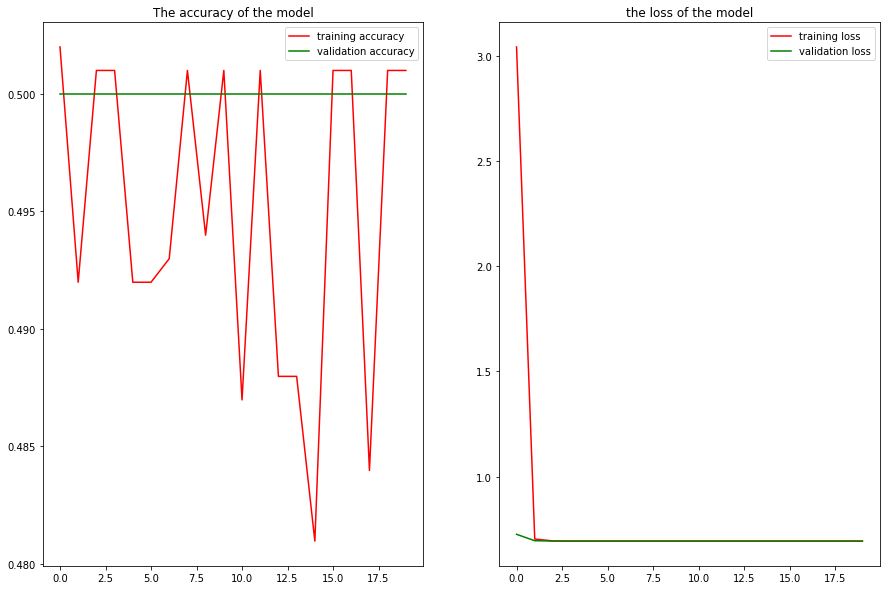

In [18]:
#绘制模型的训练效果

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize = (15,10))
plt.subplot(121)
plt.plot(epochs,acc,'r-',label = 'training accuracy')
plt.plot(epochs,val_acc,'g-',label = 'validation accuracy')
plt.legend()
plt.title('The accuracy of the model')

plt.subplot(122)
plt.plot(epochs,loss,'r-',label = 'training loss')
plt.plot(epochs,val_loss,'g-',label = 'validation loss')
plt.legend()
plt.title('the loss of the model')

由模型的训练结果来看，该模型始终无法收敛。

在卷积层和全连接层中加入高斯随机初始化

In [20]:
model_2 = tf.keras.models.Sequential([
    #添加第一个卷积池化层
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.03),
                           kernel_initializer = 'random_normal',input_shape = (64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #添加第二个卷积池化层
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.03),
                          kernel_initializer = 'random_normal'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #添加第三个卷积池化层
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.03),
                          kernel_initializer = 'random_normal'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    #将卷积之后得到的feature_map展平为长向量
    tf.keras.layers.Flatten(),
    
    #添加全连接层
    tf.keras.layers.Dense(256,activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.03),
                         kernel_initializer = 'random_normal'),
    #添加输出层
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [21]:
model_2.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['acc'])

In [22]:
history = model_2.fit_generator(train_generator,
                   steps_per_epoch = 100,
                   epochs = 20,
                   validation_data = val_generator,
                   validation_steps = 50,
                   verbose = 2)

Epoch 1/20
100/100 - 22s - loss: 28.9256 - acc: 0.4995 - val_loss: 4.1864 - val_acc: 0.5000
Epoch 2/20
100/100 - 21s - loss: 1.7701 - acc: 0.5010 - val_loss: 0.8470 - val_acc: 0.5000
Epoch 3/20
100/100 - 21s - loss: 0.7422 - acc: 0.5010 - val_loss: 0.7006 - val_acc: 0.5000
Epoch 4/20
100/100 - 21s - loss: 0.6956 - acc: 0.4770 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 5/20
100/100 - 21s - loss: 0.6934 - acc: 0.4930 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 6/20
100/100 - 21s - loss: 0.6933 - acc: 0.4860 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 7/20
100/100 - 21s - loss: 0.6932 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/20
100/100 - 12s - loss: 0.6932 - acc: 0.5010 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 9/20
100/100 - 8s - loss: 0.6932 - acc: 0.4900 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 10/20
100/100 - 8s - loss: 0.6932 - acc: 0.4820 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 11/20
100/100 - 8s - loss: 0.6932 - acc: 0.4870 - val_loss: 0.6932 - val_acc: 0.5000

Text(0.5,1,'the loss of the model')

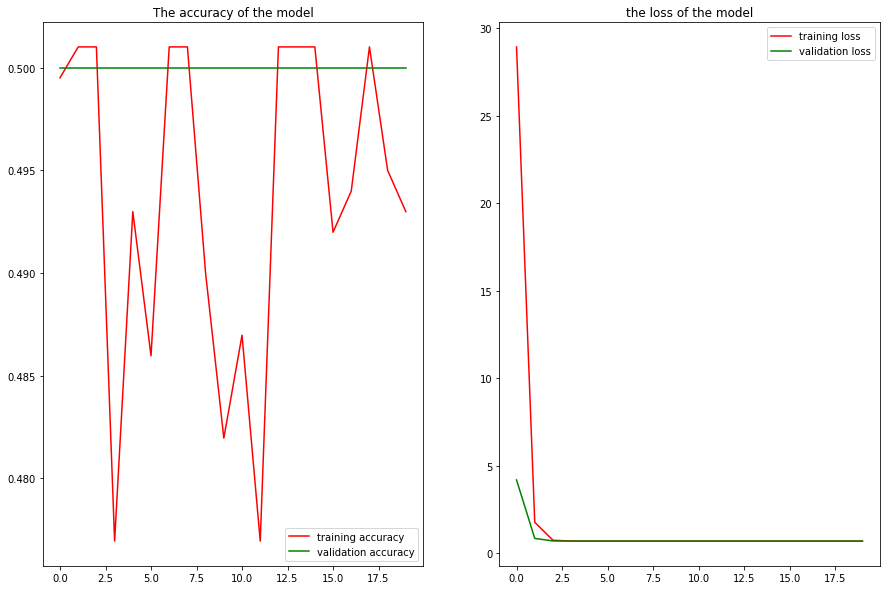

In [23]:
#绘制模型的训练效果

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize = (15,10))
plt.subplot(121)
plt.plot(epochs,acc,'r-',label = 'training accuracy')
plt.plot(epochs,val_acc,'g-',label = 'validation accuracy')
plt.legend()
plt.title('The accuracy of the model')

plt.subplot(122)
plt.plot(epochs,loss,'r-',label = 'training loss')
plt.plot(epochs,val_loss,'g-',label = 'validation loss')
plt.legend()
plt.title('the loss of the model')

### 数据增强

以上两次的改进的效果都不好，为了提升模型的效果，最有的效果的改进是从数据开始。在此我们我们采用数据增强，对原有的数据进行变换，扩充数据量。我们在ImageGenerator中设置图像数据变换的参数。

In [24]:
#构建数据生成器

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 30,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 1.5,
                                  horizontal_flip = True,
                                  vertical_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (64,64),#指定resize的大小
                                                   batch_size = 50,
                                                   class_mode = 'binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                   target_size = (64,64),
                                                   batch_size = 50,
                                                   class_mode = 'binary')

Found 1996 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
history = model.fit_generator(train_generator,
                   steps_per_epoch = 40,
                   epochs = 30,
                   validation_data = val_generator,
                   validation_steps = 20,
                   verbose = 2)

Epoch 1/30
40/40 - 10s - loss: 0.9373 - acc: 0.5556 - val_loss: 0.6487 - val_acc: 0.6280
Epoch 2/30
40/40 - 10s - loss: 0.6766 - acc: 0.5676 - val_loss: 0.6359 - val_acc: 0.6160
Epoch 3/30
40/40 - 9s - loss: 0.6606 - acc: 0.5907 - val_loss: 0.5979 - val_acc: 0.6680
Epoch 4/30
40/40 - 10s - loss: 0.6483 - acc: 0.6132 - val_loss: 0.6318 - val_acc: 0.6110
Epoch 5/30
40/40 - 10s - loss: 0.6409 - acc: 0.6197 - val_loss: 0.5918 - val_acc: 0.6870
Epoch 6/30
40/40 - 10s - loss: 0.6421 - acc: 0.6172 - val_loss: 0.5917 - val_acc: 0.6710
Epoch 7/30
40/40 - 10s - loss: 0.6286 - acc: 0.6328 - val_loss: 0.5954 - val_acc: 0.6760
Epoch 8/30
40/40 - 10s - loss: 0.6312 - acc: 0.6348 - val_loss: 0.5828 - val_acc: 0.6860
Epoch 9/30
40/40 - 10s - loss: 0.6262 - acc: 0.6408 - val_loss: 0.5953 - val_acc: 0.6750
Epoch 10/30
40/40 - 12s - loss: 0.6246 - acc: 0.6473 - val_loss: 0.5880 - val_acc: 0.6710
Epoch 11/30
40/40 - 12s - loss: 0.6268 - acc: 0.6463 - val_loss: 0.5812 - val_acc: 0.7010
Epoch 12/30
40/40 - 

Text(0.5,1,'the loss of the model')

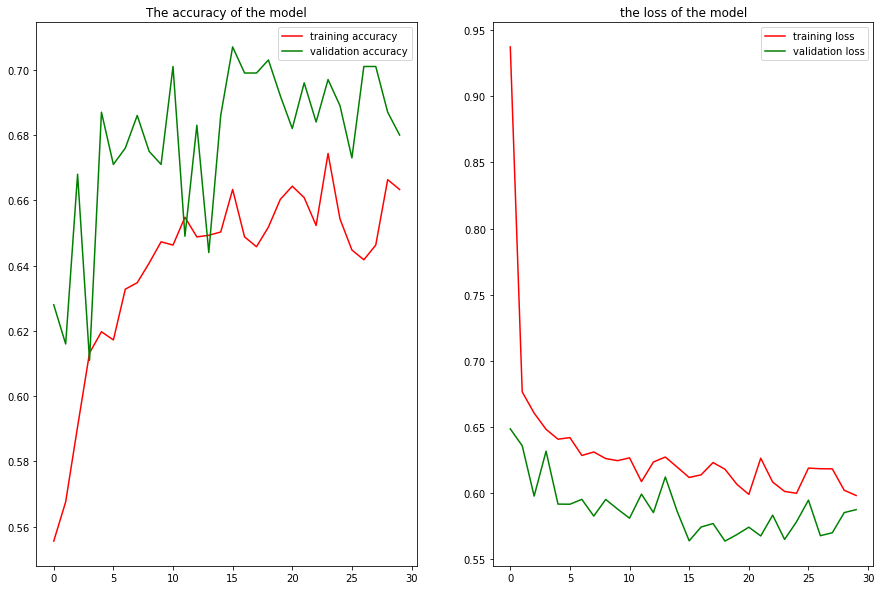

In [27]:
#绘制模型的训练效果

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize = (15,10))
plt.subplot(121)
plt.plot(epochs,acc,'r-',label = 'training accuracy')
plt.plot(epochs,val_acc,'g-',label = 'validation accuracy')
plt.legend()
plt.title('The accuracy of the model')

plt.subplot(122)
plt.plot(epochs,loss,'r-',label = 'training loss')
plt.plot(epochs,val_loss,'g-',label = 'validation loss')
plt.legend()
plt.title('the loss of the model')

由上图可以看出，模型未发生过拟合，在验证集上的准确率为68%。说明数据增强对于改善模型效果有着最直接的影响。

在卷积层和全连接层中加入Dropout层，观察模型效果。

In [28]:
model = tf.keras.models.Sequential([
    #添加第一个卷积池化层
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    
    #添加第二个卷积池化层
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    
    #添加第三个卷积池化层
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    
    
    #将卷积之后得到的feature_map展平为长向量
    tf.keras.layers.Flatten(),
    
    #添加全连接层
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    #添加输出层
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 128)      

In [31]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['acc'])

In [32]:
history = model.fit_generator(train_generator,
                   steps_per_epoch = 40,
                   epochs = 30,
                   validation_data = val_generator,
                   validation_steps = 20,
                   verbose = 2)

Epoch 1/30
40/40 - 11s - loss: 0.7085 - acc: 0.5105 - val_loss: 0.6922 - val_acc: 0.5000
Epoch 2/30
40/40 - 11s - loss: 0.6933 - acc: 0.4985 - val_loss: 0.6910 - val_acc: 0.5000
Epoch 3/30
40/40 - 10s - loss: 0.6940 - acc: 0.4935 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 4/30
40/40 - 10s - loss: 0.6936 - acc: 0.4925 - val_loss: 0.6927 - val_acc: 0.5060
Epoch 5/30
40/40 - 10s - loss: 0.6921 - acc: 0.5025 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 6/30
40/40 - 11s - loss: 0.6927 - acc: 0.5276 - val_loss: 0.6894 - val_acc: 0.5570
Epoch 7/30
40/40 - 11s - loss: 0.6925 - acc: 0.5195 - val_loss: 0.6913 - val_acc: 0.5000
Epoch 8/30
40/40 - 12s - loss: 0.6912 - acc: 0.5100 - val_loss: 0.6921 - val_acc: 0.5140
Epoch 9/30
40/40 - 13s - loss: 0.6913 - acc: 0.5185 - val_loss: 0.6875 - val_acc: 0.5050
Epoch 10/30
40/40 - 12s - loss: 0.6913 - acc: 0.5306 - val_loss: 0.6903 - val_acc: 0.5540
Epoch 11/30
40/40 - 12s - loss: 0.6926 - acc: 0.5145 - val_loss: 0.6932 - val_acc: 0.5010
Epoch 12/30
40/40 -

Text(0.5,1,'the loss of the model')

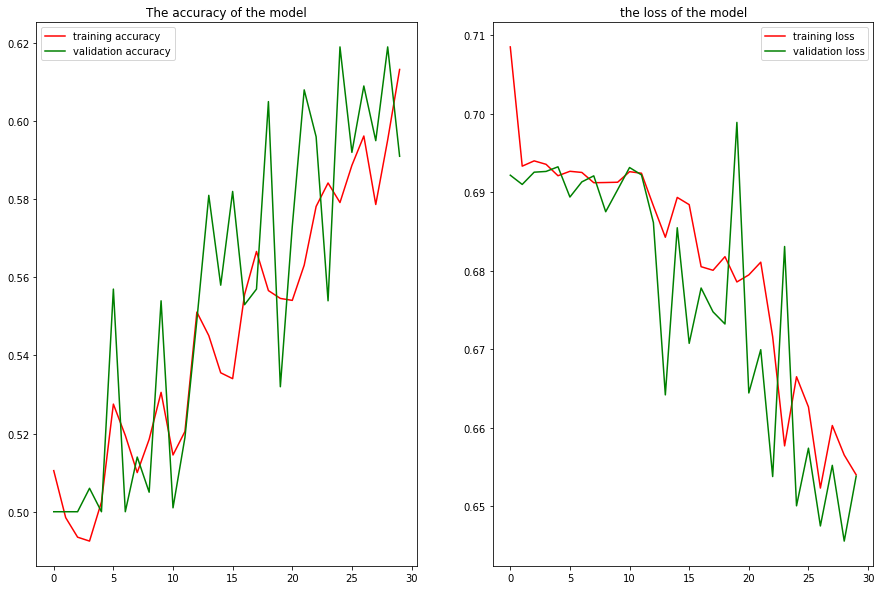

In [33]:
#绘制模型的训练效果

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize = (15,10))
plt.subplot(121)
plt.plot(epochs,acc,'r-',label = 'training accuracy')
plt.plot(epochs,val_acc,'g-',label = 'validation accuracy')
plt.legend()
plt.title('The accuracy of the model')

plt.subplot(122)
plt.plot(epochs,loss,'r-',label = 'training loss')
plt.plot(epochs,val_loss,'g-',label = 'validation loss')
plt.legend()
plt.title('the loss of the model')

### 迁移学习

In [2]:
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception

In [3]:
pred_trained_model = Xception(
    include_top=False, weights='imagenet', input_shape=(75,75,3),
)

可以选择哪些层训练

In [4]:
for layer in pred_trained_model.layers:
    layer.trainable  = False

In [5]:
#导入数据分析以及图像分类任务常用的工具包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [6]:
#指定好数据的路径
import os
base_dir = 'D:\image_dataset\cats_and_dogs'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'validation')

#训练集
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

#验证集
val_cats_dir = os.path.join(val_dir,'cats')
val_dogs_dir = os.path.join(val_dir,'dogs')

In [7]:
#构建数据生成器
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 30,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 1.5,
                                  horizontal_flip = True,
                                  vertical_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)#训练集和验证机要做同样的预处理


train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (75,75),#指定resize的大小
                                                   batch_size = 50,
                                                   class_mode = 'binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                   target_size = (75,75),
                                                   batch_size = 50,
                                                   class_mode = 'binary')

Found 1996 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
modelcheckpoint = tf.keras.callbacks.ModelCheckpoint('best_xception_modle.h5',
                                                             monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=True, mode='auto', period=1)

In [10]:
#构建一个完整的模型，自己制定全连接层，与预训练模型的卷积层组合起来。

x = layers.Flatten()(pred_trained_model.output)
x = layers.Dense(1024,activation = 'relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(1,activation = 'sigmoid')(x)

model = Model(pred_trained_model.input,x)

model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['acc'])

In [11]:
history = model.fit_generator(train_generator,
                   steps_per_epoch = 40,
                   epochs = 30,
                   validation_data = val_generator,
                   validation_steps = 20,
                   verbose = 2,callbacks = [modelcheckpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
40/40 - 51s - loss: 3.1050 - acc: 0.5090 - val_loss: 0.6883 - val_acc: 0.5000
Epoch 2/30
40/40 - 51s - loss: 0.6855 - acc: 0.5180 - val_loss: 0.6012 - val_acc: 0.7170
Epoch 3/30
40/40 - 51s - loss: 0.6861 - acc: 0.5230 - val_loss: 0.5517 - val_acc: 0.7270
Epoch 4/30
40/40 - 51s - loss: 0.6846 - acc: 0.5271 - val_loss: 0.6384 - val_acc: 0.5470
Epoch 5/30
40/40 - 51s - loss: 0.6752 - acc: 0.5792 - val_loss: 0.4944 - val_acc: 0.7690
Epoch 6/30
40/40 - 50s - loss: 0.6518 - acc: 0.6087 - val_loss: 0.4510 - val_acc: 0.7850
Epoch 7/30
40/40 - 45s - loss: 0.6559 - acc: 0.5887 - val_loss: 0.4724 - val_acc: 0.7870
Epoch 8/30
40/40 - 51s - loss: 0.6407 - acc: 0.5967 - val_loss: 0.4445 - val_acc: 0.8060
Epoch 9/30
40/40 - 51s - loss: 0.6453 - acc: 0.6017 - val_loss: 0.4671 - val_acc: 0.7680
Epoch 10/30
40/40 - 51s - loss: 0.6465 - acc: 0.6017 - val_loss: 0.4513 - val_acc: 0.8040
Epoch 11/30
40/40 - 51s - loss: 0

Text(0.5,1,'the loss of the model')

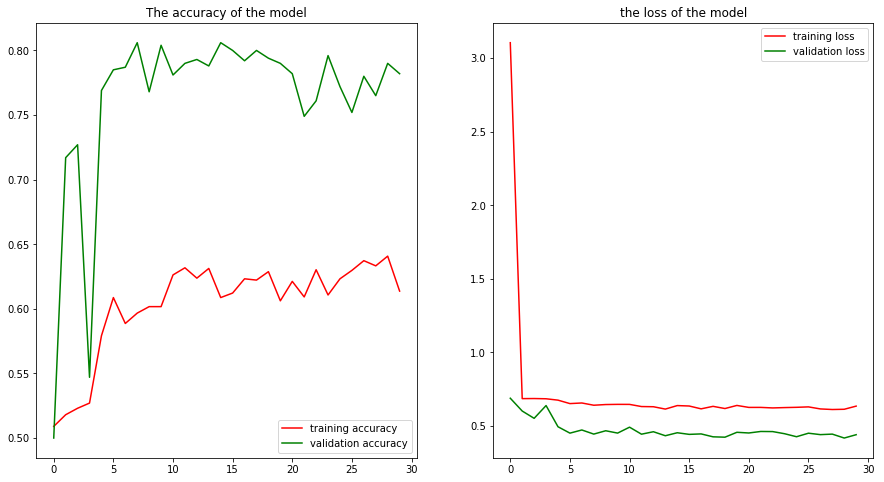

In [12]:
#绘制模型的训练效果

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize = (15,8))
plt.subplot(121)
plt.plot(epochs,acc,'r-',label = 'training accuracy')
plt.plot(epochs,val_acc,'g-',label = 'validation accuracy')
plt.legend()
plt.title('The accuracy of the model')

plt.subplot(122)
plt.plot(epochs,loss,'r-',label = 'training loss')
plt.plot(epochs,val_loss,'g-',label = 'validation loss')
plt.legend()
plt.title('the loss of the model')

tensorflow库为我们提供了很多预训练模型，这些模型都是ImageNet竞赛的冠军模型。我们采用这些模型（卷积层部分）作为我们的模型参数初始化，我们自己定义全连接层，然后将两部分拼接起来形成一个完整的模型。

预训练模型有很多，我们倾向选择轻量化（参数量少），准确率高的模型，像Resnet, Inception_V3, Xception, MobileNet等。VGG不建议，其有一亿三千万个参数，模型非常臃肿，训练起来非常的吃力。

通过使用预训练模型，大大简化了训练的难度，而且得到效果也非常的不错。